# 5. Vector Quantization or seeking k-means as decoposition

Even though k-means is a clustering algorithm, there are interesting parallels between k-means and the decomposition methods like PCA and NMF that we discussed earlier. You might remember that PCA tries to find directions of maximum variance in the data, while NMF tries to find additive components, which often correspond to “extremes” or “parts” of the data. Both methods tried to express the data points as a sum over some components. k-means, on the other hand, tries to represent each data point using a cluster center. You can think of that as each point being represented using only a single component, which is given by the cluster center. This view of k-means as a decomposition method, where each point is represented using a single component, is called vector quantization.


In [34]:
# Let’s do a side-by-side comparison of PCA, NMF, and k-means,

from sklearn.datasets import fetch_lfw_people
from sklearn.cross_validation import train_test_split
import numpy as np
from matplotlib import pyplot as plt


data=fetch_lfw_people()

In [35]:
mask=np.zeros(data.target.shape,dtype=np.bool)
for target in np.unique(data.target):
    mask[np.where(data.target==target)[0][:50]]=1
X_people=data.data[mask]
y_people=data.target[mask]

In [38]:
# Normalize the data
X_people=X_people/255

In [40]:
# Split the data into training and testing part
X_train,X_test,y_train,y_test=train_test_split(X_people,y_people,random_state=0)

In [43]:
from sklearn.decomposition import NMF
nmf=NMF(n_components=100,random_state=0)
nmf.fit(X_train)

from sklearn.decomposition import PCA
pca=PCA(n_components=100,random_state=0)
pca.fit(X_train)

from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=100,random_state=0)
kmeans.fit(X_train)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=100, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [54]:
# Now, let's visualize components extracted from above procedures
X_pca=pca.inverse_transform(pca.transform(X_test))
X_kmeans=kmeans.cluster_centers_[kmeans.predict(X_test)]
X_nmf=np.dot(nmf.transform(X_test),nmf.components_)

Text(0, 0.5, 'nmf')

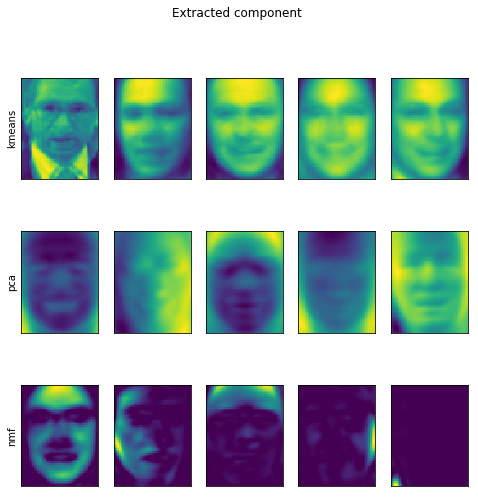

In [53]:
fig,axes=plt.subplots(3,5,figsize=(8,8),subplot_kw={'xticks':(),'yticks':()})
fig.suptitle("Extracted component")

for ax,comp_kmeans,comp_pca,comp_nmf in zip(axes.T,
            kmeans.cluster_centers_,pca.components_,nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(data.images[0].shape))
    ax[1].imshow(comp_pca.reshape(data.images[0].shape),cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(data.images[0].shape))

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")


Text(0, 0.5, 'nmf')

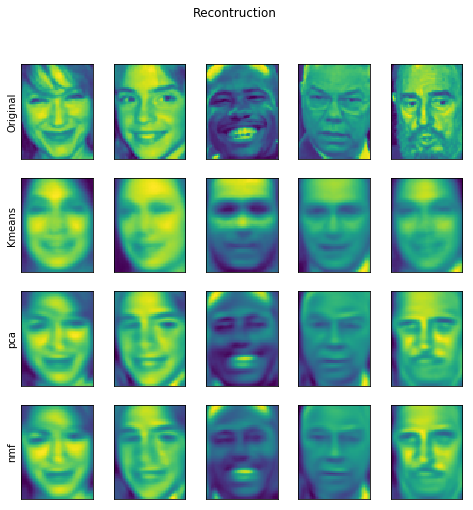

In [56]:
# Now, let's visualize reconstructed of faces
fig,axes=plt.subplots(4,5,subplot_kw={'xticks':(),'yticks':()},figsize=(8,8))
fig.suptitle("Recontruction")

for ax,orig,rec_kmeans,rec_pca,rec_nmf in zip(axes.T,X_test,X_kmeans,X_pca,X_nmf):
    ax[0].imshow(orig.reshape(data.images[0].shape))
    ax[1].imshow(rec_kmeans.reshape(data.images[0].shape))
    ax[2].imshow(rec_pca.reshape(data.images[0].shape))
    ax[3].imshow(rec_nmf.reshape(data.images[0].shape))

axes[0 , 0].set_ylabel("Original")
axes[1 , 0].set_ylabel("Kmeans")
axes[2 , 0].set_ylabel("pca")
axes[3 , 0].set_ylabel("nmf")

Now, we can see PCA done a good job while NMF is average.

An interesting aspect of vector quantization using k-means is that we can use many more clusters than input dimensions to encode our data. Let’s go back to the two_moons data. Using PCA or NMF, there is nothing much we can do to this data, as it lives in only two dimensions. Reducing it to one dimension with PCA or NMF would completely destroy the structure of the data. But we can find a more expressive representation with k-means, by using more cluster centers 

Cluster membership:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


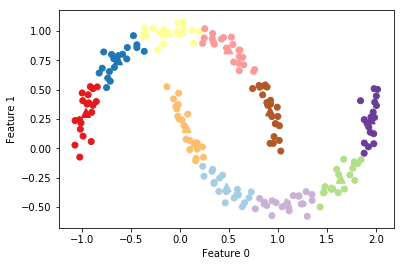

In [57]:
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=200,noise=0.05,random_state=0)

kmeans=KMeans(n_clusters=10,random_state=0)
kmeans.fit(X)
y_pred=kmeans.predict(X)

plt.scatter(X[:,0],X[:,1],c=y_pred,cmap="Paired")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=60
           ,marker="^",c=range(kmeans.n_clusters),linewidth=2,cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster membership:\n{}".format(y_pred))

Using many k-means clusters to cover the variation in a complex dataset


We used 10 cluster centers, which means each point is now assigned a number between 0 and 9. We can see this as the data being represented using 10 components (that is, we have 10 new features), with all features being 0, apart from the one that represents the cluster center the point is assigned to. Using this 10-dimensional representation, it would now be possible to separate the two half-moon shapes using a linear model, which would not have been possible using the original two features. It is also possible to get an even more expressive representation of the data by using the distances to each of the cluster centers as features. This can be accomplished using the transform method of kmeans:


In [60]:
distance_feature=kmeans.transform(X)
print("Distance feature shape: {}".format(distance_feature.shape))
print("Distance feature:\n {}".format(distance_feature))

Distance feature shape: (200, 10)
Distance feature:
 [[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


k-means is a very popular algorithm for clustering, not only because it is relatively easy to understand and implement, but also because it runs relatively quickly. kmeans scales easily to large datasets.